In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
# from matplotlib_scalebar.scalebar import ScaleBar

import rasterio as rio
import random

from rasterio.windows import Window
from rasterio.enums import Resampling

from scipy import ndimage

In [2]:
upscale_factor = 1/8

with rio.open('data\Terrain.kelani_clipped.tif') as dataset:
    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )
    profile = dataset.profile
    profile.update(transform=transform, height=data.shape[1], width=data.shape[2])

    with rio.open('outputs/upscaled_8.tif', 'w', **profile) as dst:
        dst.write(data)



Width: 2778, Height: 1375, Indexes: (1,)
bounds BoundingBox(left=399337.1412879219, bottom=488221.1374416072, right=421563.1412879219, top=499228.1374416072)
profile {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 2778, 'height': 1375, 'count': 1, 'crs': CRS.from_epsg(5235), 'transform': Affine(8.000719942404608, 0.0, 399337.1412879219,
       0.0, -8.005090909090908, 499228.1374416072), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}
crs EPSG:5235
transform | 8.00, 0.00, 399337.14|
| 0.00,-8.01, 499228.14|
| 0.00, 0.00, 1.00|


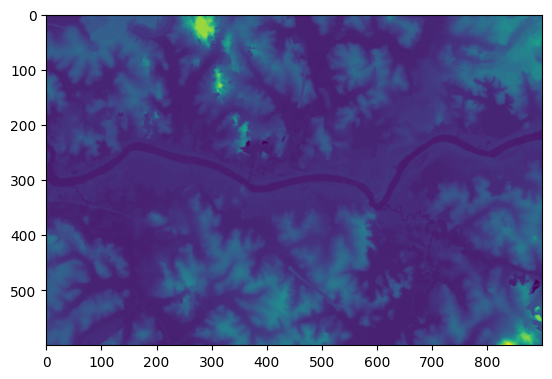

In [10]:
tif_file = 'outputs/upscaled_8.tif'

with rio.open(tif_file) as src:
    print(f"Width: {src.width}, Height: {src.height}, Indexes: {src.indexes}")
    print("bounds",src.bounds)
    print("profile",src.profile)
    print("crs",src.crs)
    print("transform",src.transform)
    img = src.read(1)
    img[img < -5] = -5
    plt.imshow(img[450:1050,1100:2000])

In [11]:
with rio.open('outputs/upscaled_8.tif') as src:
    # The size in pixels of your desired window
    h, w = 600, 900

    # Create a Window and calculate the transform from the source dataset    
    window = Window(1100, 450, w, h)
    transform = src.window_transform(window)

    # Create a new cropped raster to write to
    profile = src.profile
    profile.update({
        'height': h,
        'width': w,
        'transform': transform})

    # Write the cropped data to a new TIFF file
    with rio.open('outputs/cropped_output_8.tif', 'w', **profile) as dst:
        dst.write(src.read(window=window))

Width: 900, Height: 600, Indexes: (1,)
bounds BoundingBox(left=408137.933224567, bottom=490822.79198706173, right=415338.5811727311, top=495625.8465325163)
profile {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 900, 'height': 600, 'count': 1, 'crs': CRS.from_epsg(5235), 'transform': Affine(8.000719942404608, 0.0, 408137.933224567,
       0.0, -8.005090909090908, 495625.8465325163), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}
crs EPSG:5235
transform | 8.00, 0.00, 408137.93|
| 0.00,-8.01, 495625.85|
| 0.00, 0.00, 1.00|


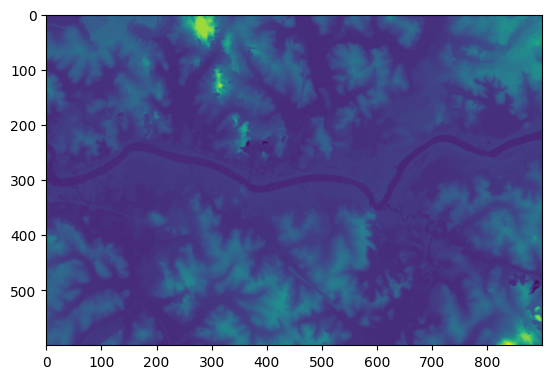

In [12]:
tif_file = 'outputs/cropped_output_8.tif'

with rio.open(tif_file) as src:
    print(f"Width: {src.width}, Height: {src.height}, Indexes: {src.indexes}")
    print("bounds",src.bounds)
    print("profile",src.profile)
    print("crs",src.crs)
    print("transform",src.transform)
    plt.imshow(src.read(1))

In [13]:
tif_file = 'outputs/cropped_output_8.tif'

with rio.open(tif_file) as src:
    print(f"Width: {src.width}, Height: {src.height}, Indexes: {src.indexes}")
    img = src.read(1)
    profile = {
        'driver':'AAIGrid',
    'height':img.shape[0],
    'width':img.shape[1],
    'count':1,
    'dtype':img.dtype,
    'crs':src.crs,
    'transform':src.transform,
    'force_cellsize':True
    }
    with rio.open('outputs/kaduwela_8.asc', 'w',**profile) as dst:
        dst.write(img, 1)
    

Width: 900, Height: 600, Indexes: (1,)


Width: 900, Height: 600, Indexes: (1,)
bounds BoundingBox(left=408137.933224567, bottom=490822.79198706173, right=415338.5811727315, top=495623.22395250475)
profile {'driver': 'AAIGrid', 'dtype': 'float32', 'nodata': None, 'width': 900, 'height': 600, 'count': 1, 'crs': CRS.from_epsg(5235), 'transform': Affine(8.000719942405, 0.0, 408137.933224567,
       0.0, -8.000719942405, 495623.22395250475), 'blockysize': 1, 'tiled': False}
crs EPSG:5235
transform | 8.00, 0.00, 408137.93|
| 0.00,-8.00, 495623.22|
| 0.00, 0.00, 1.00|
(412942.3655499812, 492818.9716126918)


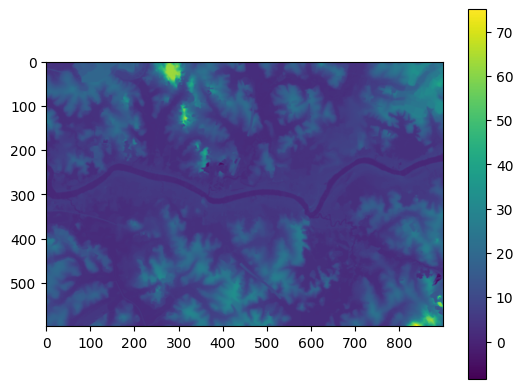

In [4]:
tif_file = 'outputs/kaduwela_8.asc'

with rio.open(tif_file) as src:
    print(f"Width: {src.width}, Height: {src.height}, Indexes: {src.indexes}")
    print("bounds",src.bounds)
    print("profile",src.profile)
    print("crs",src.crs)
    print("transform",src.transform)
    transformer = rio.transform.AffineTransformer(src.transform)
    print(transformer.xy(350,600))
    plt.imshow(src.read(1))
    plt.colorbar()

In [ ]:
# 213 - 225
# 230 - 240

In [16]:
tif_file = 'outputs/kaduwela_8.asc'
upstream_points = []
downstream_points = []
with rio.open(tif_file) as src:
    transformer = rio.transform.AffineTransformer(src.transform)
    for i in range(213,226):
        point = transformer.xy(i,900)
        upstream_points.append(point)
    for i in range(230,241):
        point = transformer.xy(i,0)
        downstream_points.append(point)

In [18]:
downstream_points

[(408141.9335845382, 493779.0580057804),
 (408141.9335845382, 493771.057285838),
 (408141.9335845382, 493763.05656589556),
 (408141.9335845382, 493755.0558459532),
 (408141.9335845382, 493747.0551260108),
 (408141.9335845382, 493739.05440606835),
 (408141.9335845382, 493731.05368612596),
 (408141.9335845382, 493723.0529661836),
 (408141.9335845382, 493715.05224624113),
 (408141.9335845382, 493707.05152629875),
 (408141.9335845382, 493699.05080635636)]

In [19]:
lines = ['Line 1', 'Line 2', 'Line 3']

with open('data/kaduwela_8_test/kaduwela_8.bci', 'w') as file:
    for line in upstream_points:
        file.write(f"P  {line[0]}  {line[1]}  FREE  0.06\n")

    for line in downstream_points:
        file.write(f"P  {line[0]}  {line[1]}  QVAR  upstream1\n")

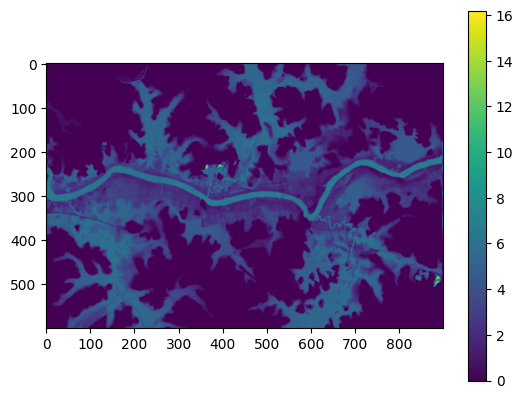

In [21]:
tif_file = 'data\kaduwela_8_test\kaduwela_1\Run1-0249.wd'

with rio.open(tif_file) as src:
    plt.imshow(src.read(1))
    plt.colorbar()
    data1 = src.read(1)


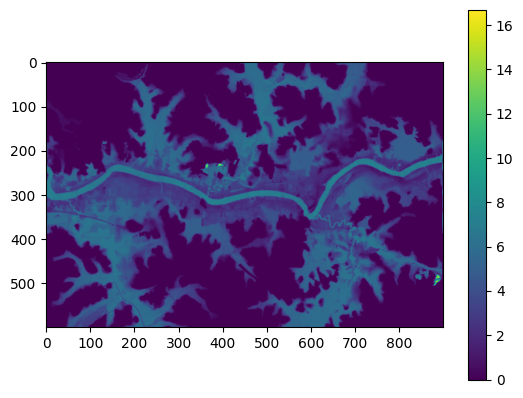

In [22]:
tif_file = 'data\kaduwela_8_test\kaduwela_1\Run1-0200.wd'

with rio.open(tif_file) as src:
    plt.imshow(src.read(1))
    plt.colorbar()
    data2 = src.read(1)


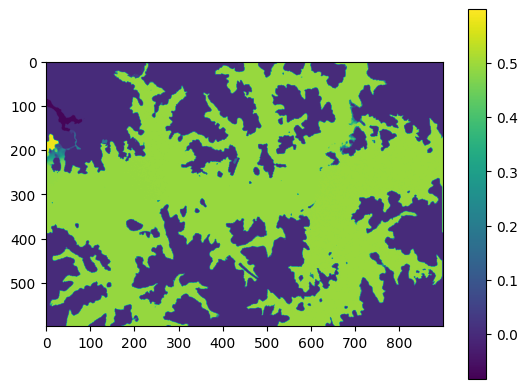

In [25]:

plt.imshow(data2-data1)
plt.colorbar()